In [1]:
import pandas as pd
import numpy as np

In [2]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Exploratory Data Analysis

In [4]:
messages.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [5]:
messages.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

In [6]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0E64FE30>,
      dtype=object)

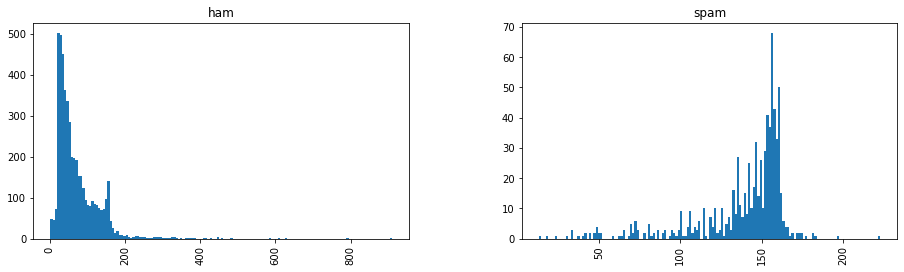

In [9]:
messages.hist(column='length',by='label',figsize=(15,4),bins=150)

### Data Preprocessing 

In [10]:
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
ws = WordNetLemmatizer()

#### function for Data Preprocessing

In [11]:
def text_process(text):
    nopunct = [char for char in text if char not in string.punctuation]
    punct_removed_text = "".join(nopunct)
    word_split = punct_removed_text.split()
    stopwords_remove = [word for word in word_split if word.lower() not in stopwords.words('english')]
    #stem_word = [ps.stem(word) for word in stopwords_remove]
    lemmat_word = [ws.lemmatize(word) for word in stopwords_remove]
    return lemmat_word

In [12]:
sample = 'This is a sample message! Please note: it has punctuation.'
text_process(sample)

['sample', 'message', 'Please', 'note', 'punctuation']

In [13]:
messages['message'].apply(text_process)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, go, usf, life, around, though]
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                      [Pity, mood, Soany, suggestion]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

Vectorization

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [16]:
len(bow_transformer.vocabulary_)

10945

In [17]:
message_bow = bow_transformer.transform(messages['message'])

In [18]:
print('Shape of sparse matrix: ',message_bow.shape)
print('Amount of non-zero occurances: ', message_bow.nnz)

Shape of sparse matrix:  (5572, 10945)
Amount of non-zero occurances:  50458


Term weighting and Normalization with TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

In [20]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [21]:
mess_tfidf = tfidf_transformer.transform(message_bow)

In [22]:
mess_tfidf.shape

(5572, 10945)

Splitting data into TrainTest data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = mess_tfidf
y = messages['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Training the Model

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
spam_detect = MultinomialNB().fit(X_train,y_train)

In [27]:
predictions = spam_detect.predict(X_test)

In [28]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

Evaluation of Model

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.72      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672

